In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_data = pd.read_csv('bank_train (1).csv')
test_data = pd.read_csv('bank_test (1).csv')

In [3]:
print(train_data.info())
print("\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4466 non-null   int64  
 1   job        4466 non-null   object 
 2   marital    4466 non-null   object 
 3   education  4466 non-null   object 
 4   default    4466 non-null   object 
 5   balance    4465 non-null   float64
 6   housing    4466 non-null   object 
 7   loan       4466 non-null   object 
 8   contact    4466 non-null   object 
 9   day        4466 non-null   int64  
 10  month      4466 non-null   object 
 11  duration   4466 non-null   int64  
 12  campaign   4466 non-null   int64  
 13  pdays      4466 non-null   int64  
 14  previous   4466 non-null   int64  
 15  poutcome   4465 non-null   object 
 16  deposit    4466 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 593.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entrie

In [4]:
print(train_data.isna().sum())
print("\n")
print(test_data.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      1
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     1
poutcome     0
deposit      0
dtype: int64


In [5]:
print(train_data.describe())
print("\n")
print(test_data.describe())

               age       balance          day     duration     campaign  \
count  4466.000000   4465.000000  4466.000000  4466.000000  4466.000000   
mean     41.100090   1484.334378    15.740484   371.089342     2.484774   
std      11.905566   3253.910473     8.448066   346.904391     2.633638   
min      18.000000  -3058.000000     1.000000     3.000000     1.000000   
25%      32.000000    107.000000     8.000000   137.000000     1.000000   
50%      38.000000    539.000000    16.000000   256.000000     2.000000   
75%      49.000000   1728.000000    22.000000   485.000000     3.000000   
max      93.000000  81204.000000    31.000000  3284.000000    43.000000   

             pdays     previous  
count  4466.000000  4466.000000  
mean     52.880878     0.866995  
std     111.146726     2.381197  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      64.750000     1.000000  
max     828.000000    41.000000  


               a

### Answer questions from 1 to 7 based on the train_data dataframe

## Q1 How many categorical columns are there in the dataframe?
 7
 
 8
 
 6
 
####  10

## Q2 How many rows in the dataframe contain missing values? If there are null values, then drop the rows with null values.
 4
 
#### 2
 
 3
 
 None

In [6]:
train_data.isna().any(axis=0).sum()

2

In [9]:
train_data = train_data.dropna(axis = 0)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4464 non-null   int64  
 1   job        4464 non-null   object 
 2   marital    4464 non-null   object 
 3   education  4464 non-null   object 
 4   default    4464 non-null   object 
 5   balance    4464 non-null   float64
 6   housing    4464 non-null   object 
 7   loan       4464 non-null   object 
 8   contact    4464 non-null   object 
 9   day        4464 non-null   int64  
 10  month      4464 non-null   object 
 11  duration   4464 non-null   int64  
 12  campaign   4464 non-null   int64  
 13  pdays      4464 non-null   int64  
 14  previous   4464 non-null   int64  
 15  poutcome   4464 non-null   object 
 16  deposit    4464 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 627.8+ KB
None


## Q3 What percentage of clients with secondary education have not subscribed to a deposit?
 43.582
 
#### 56.518
 
 51.859
 
 45.194

In [10]:
pd.crosstab(index = train_data["education"], 
            columns = train_data["deposit"],
            normalize = "index", 
            margins = False)

deposit,no,yes
education,,
primary,0.592965,0.407035
secondary,0.565177,0.434823
tertiary,0.449535,0.550465
unknown,0.494737,0.505263


## Q4 Using Seaborn’s countplot API, plot a grouped bar plot of marital status and deposit (as hue). Identify the category that has more clients who have subscribed to a deposit than clients who have not
#### Single
 
 Married
 
 Divorced
 
 None

<AxesSubplot:xlabel='marital', ylabel='count'>

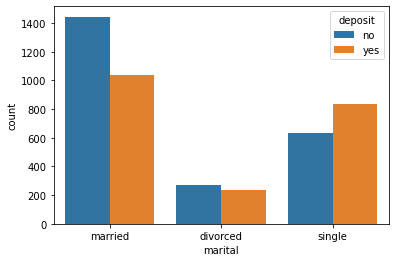

In [11]:
sns.countplot(x = train_data["marital"], hue = train_data["deposit"])

## Q5 How many clients who have not subscribed to a deposit have a housing or personal loan?
 17
 
#### 1493
 
 1553
 
 1756

In [5]:
# METHOD 1
train_data = pd.read_csv('bank_train.csv')
train_data = train_data.dropna(axis = 0, inplace = False)

filt = np.logical_and(train_data["deposit"]=="no",
                     np.logical_or(train_data["housing"]=="yes", train_data["loan"]=="yes"))

deposit_with_hos_personal = train_data[filt==True]

print(len(deposit_with_hos_personal))

1493


In [6]:
# METHOD 2
clients_housing_or_loan_having_deposit = train_data[
    ((train_data.housing == 'yes') | (train_data.loan == 'yes')) 
    & (train_data.deposit == 'yes')]

print(len(clients_housing_or_loan_having_deposit))

893


In [21]:
train_data = pd.read_csv('bank_train (1).csv')
train_data = train_data.dropna(axis = 0)
not_subscribed = train_data[train_data["deposit"] == "no"]
print(not_subscribed)
print(not_subscribed.shape)

      age          job   marital  education default  balance housing loan  \
0      76      retired   married  secondary      no   2302.0      no   no   
3      41  blue-collar   married  secondary      no    356.0     yes   no   
6      59      retired   married  secondary      no    136.0      no   no   
7      34  blue-collar   married    primary      no   5299.0     yes   no   
9      44  blue-collar   married  secondary      no    879.0     yes   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
4457   43   management   married   tertiary      no   1336.0     yes  yes   
4460   54      retired   married  secondary      no    522.0      no  yes   
4461   33   management   married   tertiary      no    133.0     yes   no   
4464   31   technician    single  secondary      no    628.0     yes   no   
4465   70      retired  divorced    primary      no    383.0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [26]:
i = 0
for x in (not_subscribed.index):
    if train_data.at[x,"housing"] == "yes" or train_data.at[x,"loan"] == "yes":
        #if train_data.at[x,"deposit"] == "no":
        i+=1
        
print(i)

## for x in range(len(train_data)):
## this shows key error as the key is dropped under dropna

1493


## Q6 What % of clients have subscribed to a term deposit as an outcome of the successful marketing campaign? (approx.)
#### 90.11
 
 9.88
 
 49.30
 
 50.69

In [25]:
train_data = pd.read_csv('bank_train (1).csv')
successful_outcome = train_data[train_data["poutcome"] == "success"]
print(successful_outcome.shape)

(435, 17)


In [27]:
i = 0

for x in (successful_outcome.index):
    if train_data.at[x,"deposit"] == "yes":
        i+=1
        
print(i)


392


In [33]:
pd.crosstab(index = train_data["poutcome"],
            columns = train_data["deposit"],
            normalize = "index",
            margins = True
)

deposit,no,yes
poutcome,,
failure,0.506931,0.493069
other,0.453333,0.546667
success,0.098851,0.901149
unknown,0.591515,0.408485
All,0.526988,0.473012


## Q7 Visualize the age and the average yearly balance of clients using a scatter plot from Seaborn API. Select the correct statement from the options below.
#### Across all age groups, the average yearly bank balance of most of the clients is less than 20,000 euros
 
 Across all age groups, the average yearly bank balance of most of the clients is more than 20,000 euros
 
 Across all age groups, the average yearly bank balance of most of the clients is within 20,000 – 40,000 euros
 
 Most of the clients aged above 50 have an average yearly bank balance of more than 40,000 euros

<AxesSubplot:xlabel='age', ylabel='balance'>

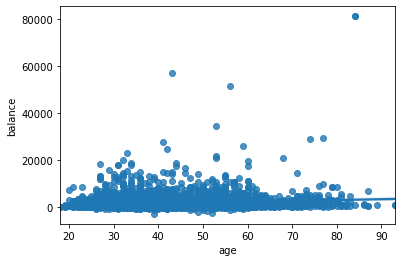

In [34]:
sns.regplot(x = train_data["age"], y = train_data["balance"])

#### Follow the steps given below to answer questions 8 - 12
Check whether test_data dataframe has any null values or not. If yes, then remove the rows with null values

Encode categorical variable, deposit - yes as 1 and no as 0

Perform dummy encoding on the categorical columns of data

Separate out the independent and dependent variables

Build a K Nearest Neighbors model with 7 nearest neighbors over the training set and validate the kNN model over the test set

## Q8 What is the accuracy of the model (Choose the appropriate range)?
 #### 70–85%
 
 85–100%
 
 60–70%
 
 Less than 60 %

In [2]:
train_data = pd.read_csv('bank_train (1).csv')
test_data = pd.read_csv('bank_test (1).csv')

In [3]:
train_data = train_data.dropna(axis = 0)
test_data = test_data.dropna(axis = 0)

In [4]:
train_data["deposit"] = train_data["deposit"].map({"yes":1, "no":0})
test_data["deposit"] = test_data["deposit"].map({"yes":1, "no":0})

In [5]:
train_data = pd.get_dummies(data = train_data, drop_first = True)
test_data = pd.get_dummies(data = test_data, drop_first = True)

In [6]:
train_X = train_data.drop(["deposit"],axis = 1, inplace = False)
train_Y = train_data["deposit"]

test_X = test_data.drop(["deposit"],axis = 1, inplace = False)
test_Y = test_data["deposit"]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN_all = KNeighborsClassifier(n_neighbors = 7)

In [8]:
KNN_all.fit(train_X,train_Y)

KNeighborsClassifier(n_neighbors=7)

In [9]:
pred_all = KNN_all.predict(test_X)

In [10]:
acc_all = accuracy_score(test_Y, pred_all)
print(acc_all)

0.767921146953405


## Q 9 How many samples were misclassified by the model (Choose the appropriate range)?
 100–150
 
 151–200
 
 #### 201–300
 
 More than 300

In [11]:
(test_Y != pred_all).sum()

259

In [12]:
confuse = confusion_matrix(test_Y, pred_all)
print(confuse)

[[490 116]
 [143 367]]


[[TN FP]

 [FN TP]]
 
Actual alog horizontal, predicted along vertical

## Q 10 What is the sensitivity of the model (Choose the appropriate range)?
 Less than 0.60
 
#### 0.61–0.80
 
 0.81–0.90
 
 More than 0.90
 
 #### Sensitivity = TP / (TP + FN)

In [24]:
cm1 = confusion_matrix(test_Y, pred_all)
#sensitivity1 = cm1[0,0]/(cm1[0,0] + cm1[0,1])
#.... by interpretting confusion matrix as [[TP FN]]
#                                          [[FP TN]]... as per wikipedia

sensitivity1 = cm1[1,1]/(cm1[1,0] + cm1[1,1])
#.... by interpretting confusion matrix as [[TN FP]]
#                                          [[FN TP]]... as per sklearn documentation
print(sensitivity1)

0.7196078431372549


## Q11 What is the specificity of the model (Choose the appropriate range)?

 Less than 0.60
 
 0.61–0.70
 
 #### 0.71–0.90
 
 More than 0.90
 
#### Specificity = TN / (TN + FP)

In [15]:
#specificity = cm1[1,1]/(cm1[1,1] + cm1[1,0])
#.... by interpretting confusion matrix as [[TP FN]]
#                                          [[FP TN]]... as per wikipedia

specificity = cm1[0,0]/(cm1[0,0] + cm1[0,1])
#.... by interpretting confusion matrix as [[TN FP]]
#                                          [[FN TP]]... as per sklearn documentation
print(specificity)

0.8085808580858086


## Q12 What is the prevalence of the model (Choose the appropriate range)?
 Less than 0.40
 
 #### 0.41–0.50
 
 0.51–0.60
 
 0.61–0.70
 
#### prevalence = (TP + FN) / (Total) = (Total Actual Positive) / / (Total population)

In [28]:
knn_prevalence = (cm1[1,1] + cm1[1,0]) / (cm1[1,1] + cm1[1,0] + cm1[0,1] + cm1[0,0]) 
print(knn_prevalence)

0.45698924731182794


#### Follow the steps given below to answer questions 13 - 15
Check whether test_data dataframe has any null values or not. If yes, then remove the rows with null values

Encode categorical variable, deposit - yes as 1 and no as 0

Perform dummy encoding on the categorical columns of data

Separate out the independent and dependent variables

Build a logistic regression model (with random_state of the logistic regression instance as 0) over the training set and validate the model over the test set

In [17]:
lgr = LogisticRegression(random_state = 0)

In [18]:
lgr.fit(train_X, train_Y)

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [19]:
lgr_pred = lgr.predict(test_X)

In [20]:
lgr_acc = accuracy_score(test_Y, lgr_pred)
print(lgr_acc)

0.8100358422939068


In [21]:
lgr_confuse = confusion_matrix(test_Y, lgr_pred)
print(lgr_confuse)

[[514  92]
 [120 390]]


[[TN FP]

 [FN TP]]
 
Actual alog horizontal, predicted along vertical

## Q13 What is the sensitivity of the model (Choose the appropriate range)?
 Less than 0.60
 
 0.61–0.70
 
 #### 0.71–0.90
 
 More than 0.90
 
 #### Sensitivity = TP / (TP + FN)

In [23]:
cm2 = confusion_matrix(test_Y, lgr_pred)
#sensitivity1 = cm2[0,0]/(cm2[0,0] + cm2[0,1])
#.... by interpretting confusion matrix as [[TP FN]]
#                                          [[FP TN]]... as per wikipedia

sensitivity2 = cm2[1,1]/(cm2[1,0] + cm2[1,1])
#.... by interpretting confusion matrix as [[TN FP]]
#                                          [[FN TP]]... as per sklearn documentation
print(sensitivity2)

0.7647058823529411


## Q14 What is the specificity of the model (Choose the appropriate range)?
 Less than 0.60
 
 0.60–0.70
 
 0.71–0.80
 
 #### More than 0.80
 
#### Specificity = TN / (TN + FP)

In [26]:

#specificity2 = cm2[1,1]/(cm2[1,1] + cm2[1,0])
#.... by interpretting confusion matrix as [[TP FN]]
#                                          [[FP TN]]... as per wikipedia

specificity2 = cm2[0,0]/(cm2[0,0] + cm2[0,1])
#.... by interpretting confusion matrix as [[TN FP]]
#                                          [[FN TP]]... as per sklearn documentation

print(specificity2)

0.8481848184818482


## Q15 What is the prevalence of the model (Choose the appropriate range)?
 Less than 0.40
 
 #### 0.41–0.50
 
 0.51–0.60
 
 0.61–0.70
 
#### prevalence = (TP + FN) / (Total) = (Total Actual Positive) / / (Total population)

In [27]:
lgr_prevalence = (cm2[1,1] + cm2[1,0]) / (cm2[1,1] + cm2[1,0] + cm2[0,1] + cm2[0,0]) 
print(lgr_prevalence)

0.45698924731182794
